In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('cuentas_credicel.csv')
df.head(5)

C:\Users\luis-\AppData\Local\Temp\ipykernel_11100\2319598477.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('cuentas_credicel.csv')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/2021 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/2021 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/2021 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/2021 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/2021 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [4]:
df.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [5]:
df = df.fillna(df.mode().iloc[0])

In [6]:
df.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [7]:
df[df['limite_credito'] == 'SD'] = 0
df['limite_credito'] = df['limite_credito'].astype('float64')

In [8]:
#sns.pairplot(df)

In [9]:
def  func1 (x, a, b, c):
    return (a * x ** 2 + b)/ c*x
    
def  func2 (x, a, b, c):
    return a/b * x ** 2 + c * x
    
def  func3 (x, a, b, c):
    return 1/a * x ** 2
    
def  func4 (x, a, b, c):
    return a * x + b * x + c * x
    
def  func5 (x, a, b, c):
    return a * np.abs(x) + b * x + c


mod1 = [['riesgo','porc_eng',func1],
        ['riesgo','limite_credito',func2],
        ['riesgo','puntos',func3],
        ['riesgo','enganche',func4],
        ['riesgo','pagos_realizados',func5]]

mod2 = [['score_buro','status',func1],
        ['score_buro','pagos_realizados',func2],
        ['score_buro','puntos',func3],
        ['score_buro','semana_actual',func4],
        ['score_buro','limite_credito',func5]]

mod3 = [['porc_eng','enganche',func1],
        ['porc_eng','costo_total',func2],
        ['porc_eng','puntos',func5],
        ['porc_eng','riesgo',func5],
        ['porc_eng','limite_credito',func5]]

mod4 = [['limite_credito','porc_eng',func1],
        ['limite_credito','riesgo',func5],
        ['limite_credito','puntos',func5],
        ['limite_credito','semana_actual',func5],
        ['limite_credito','pagos_realizados',func5]]


Modelo 1 - Objetivo: riesgo Variable: porc_eng
Parámetros: [-2.93545297e-05  6.09598617e+00  1.93110616e+01]
0        12.535813
1        10.986492
2         7.871209
3         7.871209
4         7.871209
           ...    
22730     2.798961
22731     9.270220
22732     7.480008
22733     8.980217
22734     6.335827
Name: porc_eng, Length: 22735, dtype: float64


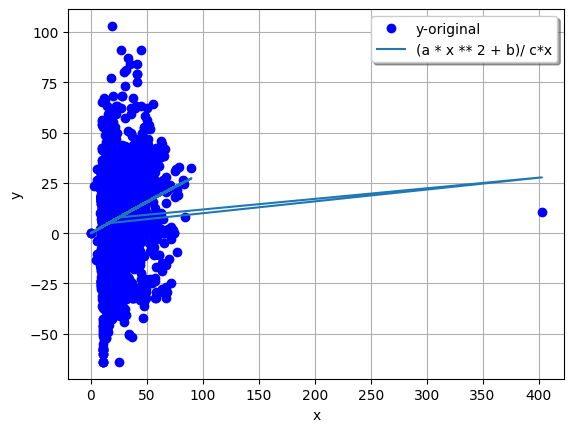

Coeficiente de determinación: 0.09665918093111003
Coeficiente de correlación: 0.31090059654350943

Modelo 2 - Objetivo: riesgo Variable: limite_credito
Parámetros: [-4.91350198e-07  5.95213034e-01  6.20414044e-03]
0        10.383125
1         7.506731
2         0.000000
3         2.979332
4         2.979332
           ...    
22730   -20.508905
22731    10.383125
22732    10.844254
22733     2.979332
22734    10.844254
Name: limite_credito, Length: 22735, dtype: float64


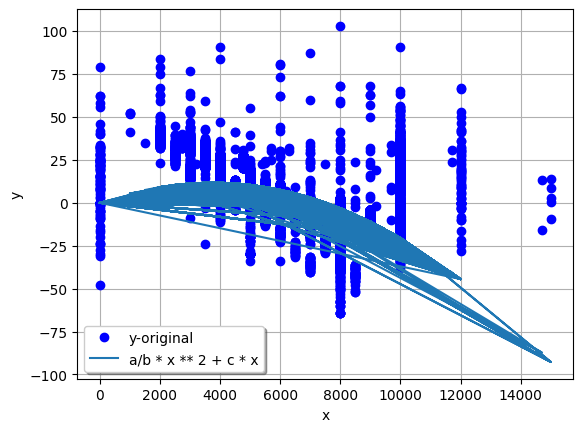

Coeficiente de determinación: 0.31172734302112703
Coeficiente de correlación: 0.5583254812572386

Modelo 3 - Objetivo: riesgo Variable: puntos
Parámetros: [9.98081271e+08 1.00000000e+00 1.00000000e+00]


C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


0        0.000000e+00
1        0.000000e+00
2        0.000000e+00
3        0.000000e+00
4        0.000000e+00
             ...     
22730    1.001922e-07
22731    8.115572e-08
22732    1.212326e-07
22733    1.963768e-07
22734    1.442768e-07
Name: puntos, Length: 22735, dtype: float64


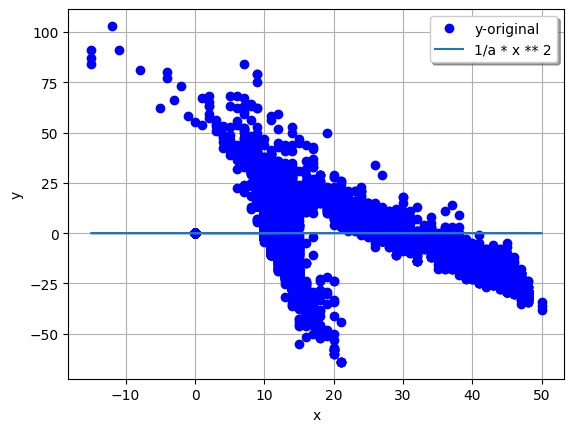

Coeficiente de determinación: -0.08815263895322079
Coeficiente de correlación: 0.2969051009215247

Modelo 4 - Objetivo: riesgo Variable: enganche
Parámetros: [  70.71280281   70.71280281 -141.41899075]
0         5.159605
1         6.945621
2         3.241290
3         3.241290
4         7.110993
           ...    
22730     1.964619
22731     7.997387
22732     7.620339
22733    18.515042
22734     7.183757
Name: enganche, Length: 22735, dtype: float64


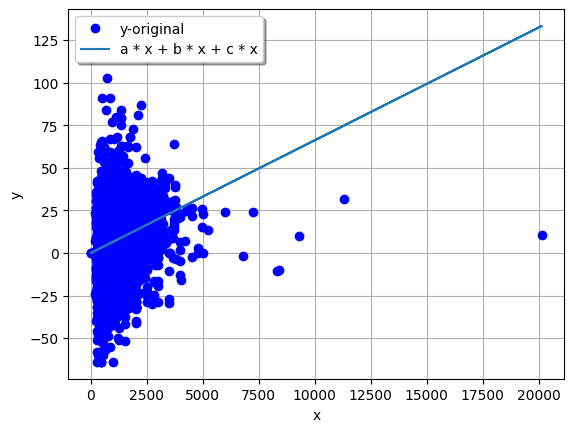

Coeficiente de determinación: 0.06294658568280687
Coeficiente de correlación: 0.2508915815303632

Modelo 5 - Objetivo: riesgo Variable: pagos_realizados
Parámetros: [-100.34447006   99.908042      9.7066118 ]
0        9.706612
1        9.706612
2        9.706612
3        9.706612
4        9.706612
           ...   
22730    9.706612
22731    9.706612
22732    9.706612
22733    9.706612
22734    9.706612
Name: pagos_realizados, Length: 22735, dtype: float64


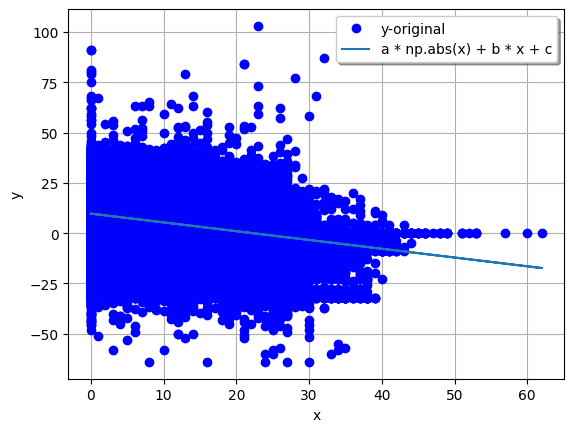

Coeficiente de determinación: 0.05711637640685363
Coeficiente de correlación: 0.23899032701524475


In [10]:
cont = 1

for obj, var, func in mod1:
        
    Vars_Indep= df[var]
    Var_Dep= df[obj]

    x= Vars_Indep
    y= Var_Dep
    
    print('\nModelo',cont,'- Objetivo:', obj, 'Variable:', var)

    parametros, covs= curve_fit(func, df[var], df[obj])
    print('Parámetros:',parametros)

    parametros, _ = curve_fit(func, df[var], df[obj])
    a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
    
    if func == func1:
        yfit = (a * x ** 2 + b)/ c*x
        etiqueta = '(a * x ** 2 + b)/ c*x'
    elif func == func2:
        yfit = a/b * x ** 2 + c * x
        etiqueta = 'a/b * x ** 2 + c * x'
    elif func == func3:
        yfit = 1/a * x ** 2
        etiqueta = '1/a * x ** 2'
    elif func == func4:
        yfit = a * x + b * x + c * x
        etiqueta = 'a * x + b * x + c * x'
    elif func == func5:
        yfit = a * np.abs(x) + b * x + c
        etiqueta = 'a * np.abs(x) + b * x + c'

    print(yfit)

    plt.plot(x, y, 'bo', label="y-original")
    plt.plot(x, yfit, label=etiqueta)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    R2 = r2_score(y, yfit)
    print('Coeficiente de determinación:',R2)

    corr= np.sqrt(abs(R2))
    print('Coeficiente de correlación:',corr)
    cont += 1


Modelo 1 - Objetivo: score_buro Variable: status
[-173.51606263 1065.70620614    2.9913329 ]
0        248.479169
1        248.479169
2       -497.375292
3        248.479169
4        298.258393
            ...    
22730    298.258393
22731    298.258393
22732    298.258393
22733    298.258393
22734    298.258393
Name: status, Length: 22735, dtype: float64


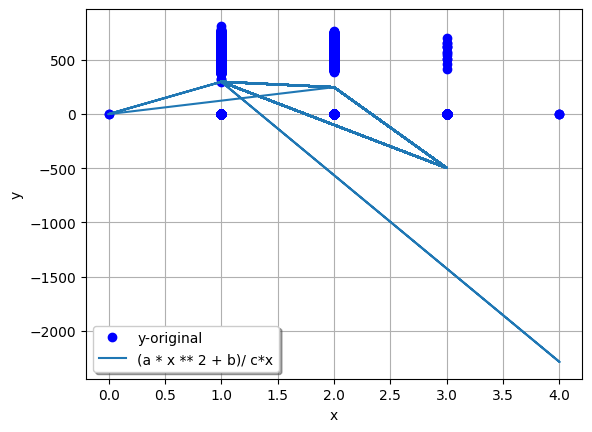

Coeficiente de determinación: 0.0003841468737699749
Coeficiente de correlación: 0.019599665144332822

Modelo 2 - Objetivo: score_buro Variable: pagos_realizados
[-2.24709666  1.91494034 40.66959707]
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22730    0.0
22731    0.0
22732    0.0
22733    0.0
22734    0.0
Name: pagos_realizados, Length: 22735, dtype: float64


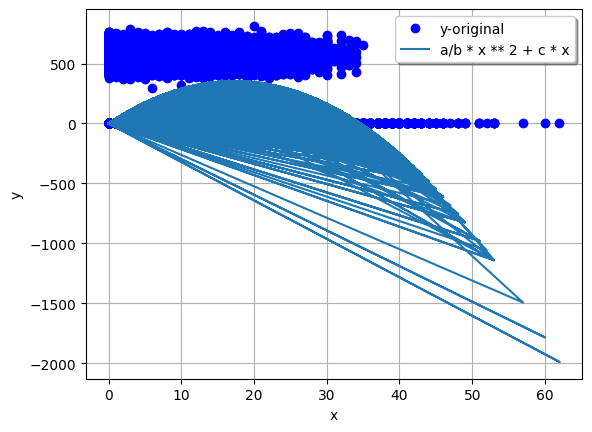

Coeficiente de determinación: -0.36616471873431644
Coeficiente de correlación: 0.6051154590111845

Modelo 3 - Objetivo: score_buro Variable: puntos
[10.04926456  1.          1.        ]
0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
           ...    
22730     9.950977
22731     8.060291
22732    12.040682
22733    19.503915
22734    14.329407
Name: puntos, Length: 22735, dtype: float64


C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\ProgramData\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


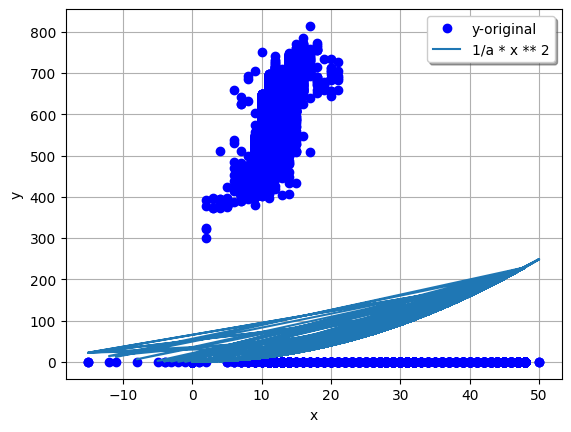

Coeficiente de determinación: -0.9924114319446335
Coeficiente de correlación: 0.9961984902340665

Modelo 4 - Objetivo: score_buro Variable: semana_actual
[-139.28220518   72.84982917   72.84982917]
0        166.853782
1         83.426891
2        474.891534
3         83.426891
4        474.891534
            ...    
22730      0.000000
22731      0.000000
22732      0.000000
22733      0.000000
22734      0.000000
Name: semana_actual, Length: 22735, dtype: float64


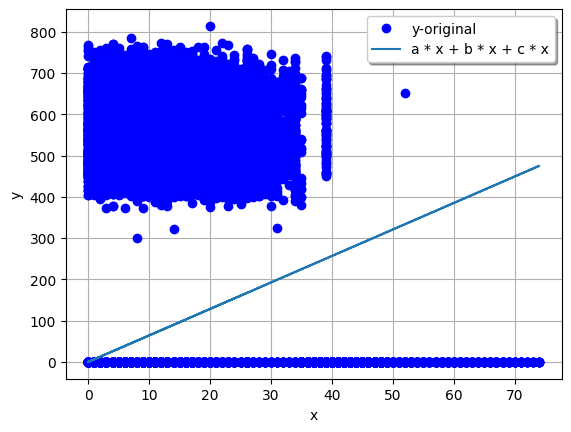

Coeficiente de determinación: -0.7166875582188859
Coeficiente de correlación: 0.8465740122510765

Modelo 5 - Objetivo: score_buro Variable: limite_credito
[  99.98992386 -100.0100774   409.25826224]
0        308.490593
1        288.337059
2        409.258262
3        268.183525
4        268.183525
            ...    
22730    207.722923
22731    308.490593
22732    313.528976
22733    268.183525
22734    313.528976
Name: limite_credito, Length: 22735, dtype: float64


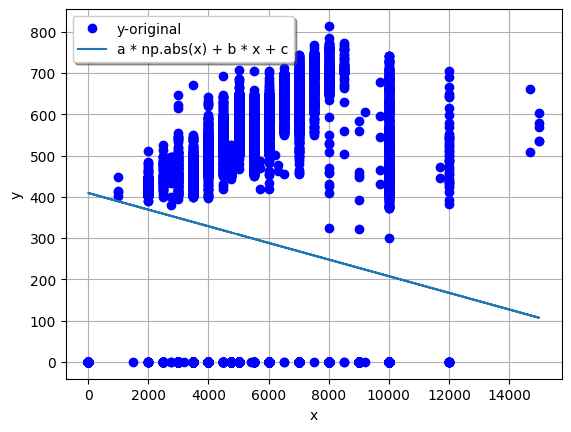

Coeficiente de determinación: 0.02299919233412684
Coeficiente de correlación: 0.15165484606212504


In [11]:
cont = 1

for obj, var, func in mod2:
        
    Vars_Indep= df[var]
    Var_Dep= df[obj]

    x= Vars_Indep
    y= Var_Dep
    
    print('\nModelo',cont,'- Objetivo:', obj, 'Variable:', var)

    parametros, covs= curve_fit(func, df[var], df[obj])
    print(parametros)

    parametros, _ = curve_fit(func, df[var], df[obj])
    a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
    
    if func == func1:
        yfit = (a * x ** 2 + b)/ c*x
        etiqueta = '(a * x ** 2 + b)/ c*x'
    elif func == func2:
        yfit = a/b * x ** 2 + c * x
        etiqueta = 'a/b * x ** 2 + c * x'
    elif func == func3:
        yfit = 1/a * x ** 2
        etiqueta = '1/a * x ** 2'
    elif func == func4:
        yfit = a * x + b * x + c * x
        etiqueta = 'a * x + b * x + c * x'
    elif func == func5:
        yfit = a * np.abs(x) + b * x + c
        etiqueta = 'a * np.abs(x) + b * x + c'

    print(yfit)

    plt.plot(x, y, 'bo', label="y-original")
    plt.plot(x, yfit, label=etiqueta)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    R2 = r2_score(y, yfit)
    print('Coeficiente de determinación:',R2)

    corr= np.sqrt(abs(R2))
    print('Coeficiente de correlación:',corr)
    cont += 1


Modelo 1 - Objetivo: porc_eng Variable: enganche
[-3.68618746e-10  4.61016894e-01  2.07403211e+01]
0        17.329445
1        23.318878
2        10.889653
3        10.889653
4        23.873074
           ...    
22730     6.601265
22731    26.842304
22732    25.579542
22733    61.826576
22734    24.116898
Name: enganche, Length: 22735, dtype: float64


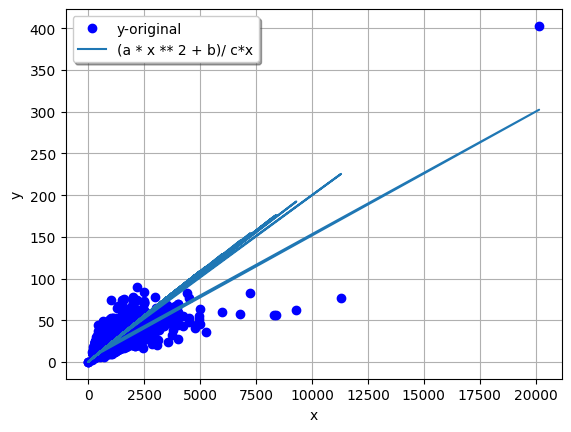

Coeficiente de determinación: -0.18693522922094652
Coeficiente de correlación: 0.43236006894826273

Modelo 2 - Objetivo: porc_eng Variable: costo_total
[-8.53318561e-07  2.24334832e+00  6.27542402e-03]
0        11.528980
1        15.101251
2        12.010887
3        12.010887
4        25.233097
           ...    
22730    22.979069
22731    22.346805
22732    24.917624
22733     8.268042
22734    25.797021
Name: costo_total, Length: 22735, dtype: float64


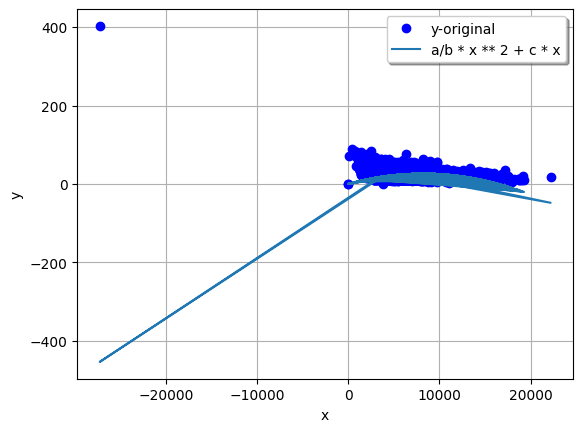

Coeficiente de determinación: -1.0728638460181998
Coeficiente de correlación: 1.0357914104771289

Modelo 3 - Objetivo: porc_eng Variable: puntos
[ 0.04840471 -0.28363541 26.53407239]
0        26.534072
1        26.534072
2        26.534072
3        26.534072
4        26.534072
           ...    
22730    24.181765
22731    24.416996
22732    23.946535
22733    23.240843
22734    23.711304
Name: puntos, Length: 22735, dtype: float64


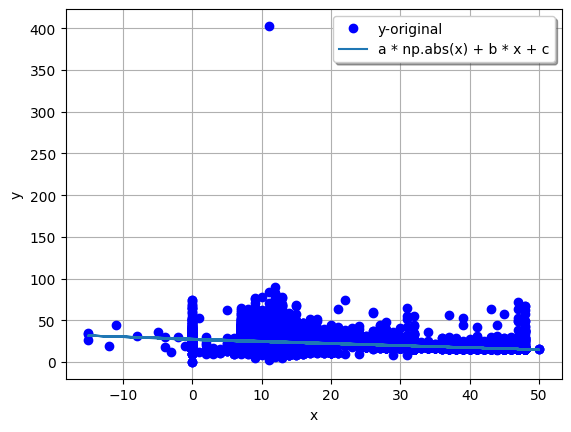

Coeficiente de determinación: 0.12778405040216734
Coeficiente de correlación: 0.3574689502630506

Modelo 4 - Objetivo: porc_eng Variable: riesgo
[-0.02419628  0.20557049 22.47260704]
0        22.472607
1        22.472607
2        22.472607
3        22.472607
4        22.472607
           ...    
22730    27.442260
22731    25.918717
22732    27.306230
22733    18.486154
22734    26.426565
Name: riesgo, Length: 22735, dtype: float64


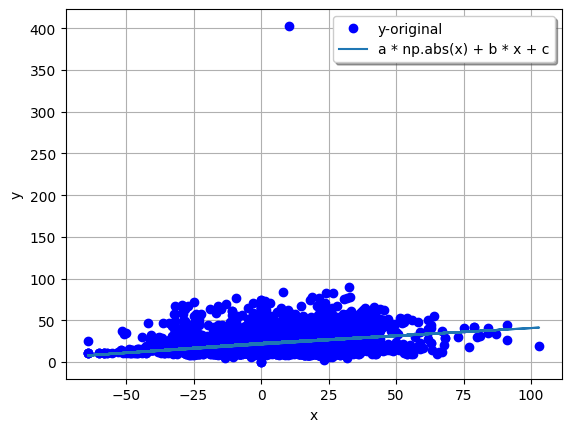

Coeficiente de determinación: 0.2257963983591892
Coeficiente de correlación: 0.47518038507412025

Modelo 5 - Objetivo: porc_eng Variable: limite_credito
[-100.00101203   99.99898924   35.17910436]
0        25.065154
1        23.042364
2        35.179104
3        21.019573
4        21.019573
           ...    
22730    14.951203
22731    25.065154
22732    25.570851
22733    21.019573
22734    25.570851
Name: limite_credito, Length: 22735, dtype: float64


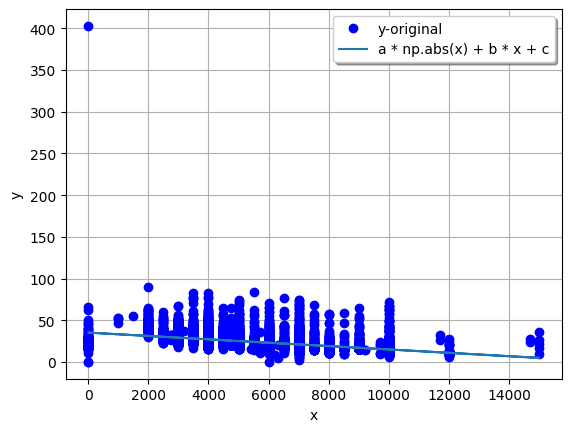

Coeficiente de determinación: 0.3318828862554396
Coeficiente de correlación: 0.5760927757362


In [12]:
cont = 1

for obj, var, func in mod3:
        
    Vars_Indep= df[var]
    Var_Dep= df[obj]

    x= Vars_Indep
    y= Var_Dep
    
    print('\nModelo',cont,'- Objetivo:', obj, 'Variable:', var)

    parametros, covs= curve_fit(func, df[var], df[obj])
    print(parametros)

    parametros, _ = curve_fit(func, df[var], df[obj])
    a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
    
    if func == func1:
        yfit = (a * x ** 2 + b)/ c*x
        etiqueta = '(a * x ** 2 + b)/ c*x'
    elif func == func2:
        yfit = a/b * x ** 2 + c * x
        etiqueta = 'a/b * x ** 2 + c * x'
    elif func == func3:
        yfit = 1/a * x ** 2
        etiqueta = '1/a * x ** 2'
    elif func == func4:
        yfit = a * x + b * x + c * x
        etiqueta = 'a * x + b * x + c * x'
    elif func == func5:
        yfit = a * np.abs(x) + b * x + c
        etiqueta = 'a * np.abs(x) + b * x + c'

    print(yfit)

    plt.plot(x, y, 'bo', label="y-original")
    plt.plot(x, yfit, label=etiqueta)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    R2 = r2_score(y, yfit)
    print('Coeficiente de determinación:',R2)

    corr= np.sqrt(abs(R2))
    print('Coeficiente de correlación:',corr)
    cont += 1


Modelo 1 - Objetivo: limite_credito Variable: porc_eng
[-5.04199071e+00  7.25444749e+05  3.30121320e+03]
0        8696.538339
1        7627.941131
2        5472.078411
3        5472.078411
4        5472.078411
            ...     
22730    1948.125100
22731    6441.285691
22732    5200.796156
22733    6240.507468
22734    4406.770444
Name: porc_eng, Length: 22735, dtype: float64


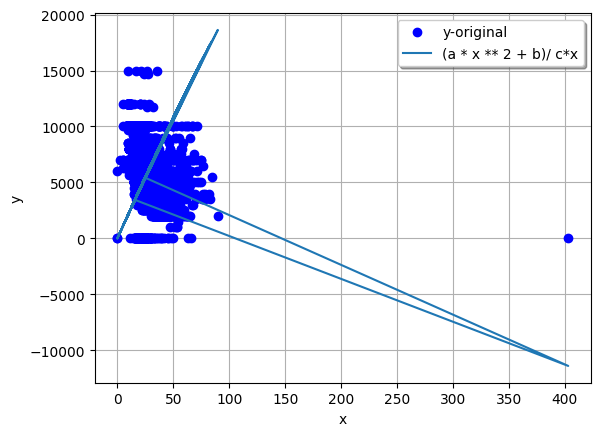

Coeficiente de determinación: -1.5351587686513648
Coeficiente de correlación: 1.2390152414927609
1.2390152414927609

Modelo 2 - Objetivo: limite_credito Variable: riesgo
[   8.06690304  -89.13344501 6272.2564338 ]
0        6272.256434
1        6272.256434
2        6272.256434
3        6272.256434
4        6272.256434
            ...     
22730    4051.033184
22731    4731.992136
22732    4111.833090
22733    7958.682472
22734    4505.005819
Name: riesgo, Length: 22735, dtype: float64


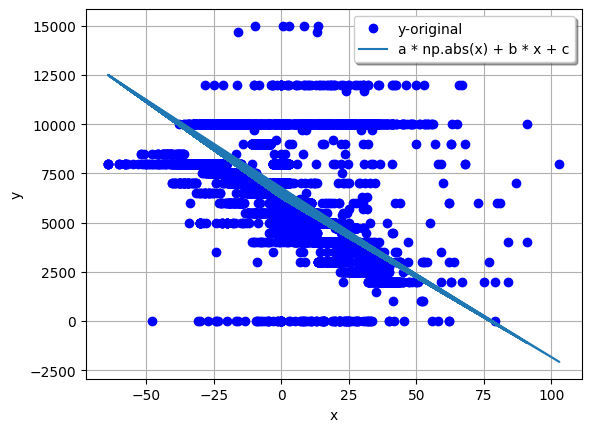

Coeficiente de determinación: 0.5281769372517643
Coeficiente de correlación: 0.7267578257244736
0.7267578257244736

Modelo 3 - Objetivo: limite_credito Variable: puntos
[ 138.35823126  -41.34994477 4545.40963669]
0        4545.409637
1        4545.409637
2        4545.409637
3        4545.409637
4        4545.409637
            ...     
22730    5515.492502
22731    5418.484215
22732    5612.500788
22733    5903.525648
22734    5709.509075
Name: puntos, Length: 22735, dtype: float64


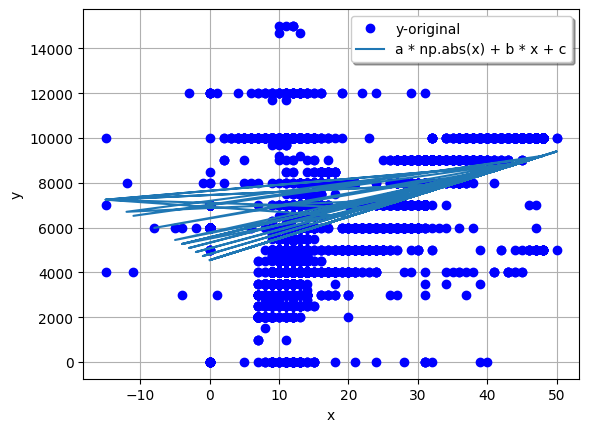

Coeficiente de determinación: 0.2672754443822778
Coeficiente de correlación: 0.5169868899520352
0.5169868899520352

Modelo 4 - Objetivo: limite_credito Variable: semana_actual
[ 240.29966621 -191.97517278 4923.81763324]
0        6180.254462
1        5552.036048
2        8499.830147
3        5552.036048
4        8499.830147
            ...     
22730    4923.817633
22731    4923.817633
22732    4923.817633
22733    4923.817633
22734    4923.817633
Name: semana_actual, Length: 22735, dtype: float64


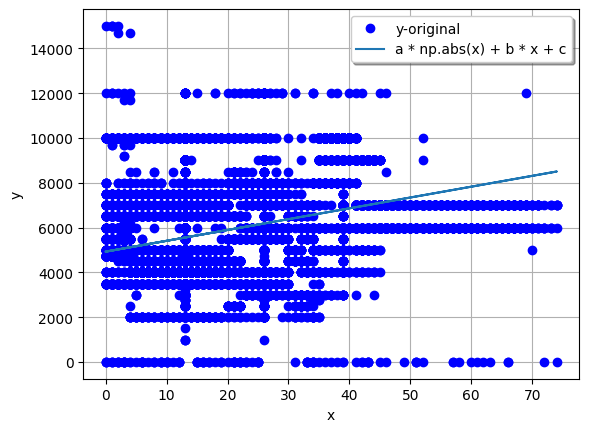

Coeficiente de determinación: 0.1088389165965874
Coeficiente de correlación: 0.32990743640692216
0.32990743640692216

Modelo 5 - Objetivo: limite_credito Variable: pagos_realizados
[ 105.12313423  -50.20809305 5360.75426772]
0        5360.754268
1        5360.754268
2        5360.754268
3        5360.754268
4        5360.754268
            ...     
22730    5360.754268
22731    5360.754268
22732    5360.754268
22733    5360.754268
22734    5360.754268
Name: pagos_realizados, Length: 22735, dtype: float64


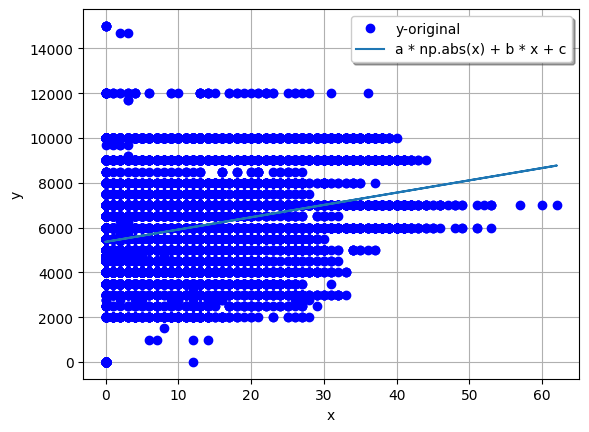

Coeficiente de determinación: 0.06222694933778572
Coeficiente de correlación: 0.2494533009157941
0.2494533009157941


In [13]:
cont = 1

for obj, var, func in mod4:
        
    Vars_Indep= df[var]
    Var_Dep= df[obj]

    x= Vars_Indep
    y= Var_Dep
    
    print('\nModelo',cont,'- Objetivo:', obj, 'Variable:', var)

    parametros, covs= curve_fit(func, df[var], df[obj])
    print(parametros)

    parametros, _ = curve_fit(func, df[var], df[obj])
    a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
    
    if func == func1:
        yfit = (a * x ** 2 + b)/ c*x
        etiqueta = '(a * x ** 2 + b)/ c*x'
    elif func == func2:
        yfit = a/b * x ** 2 + c * x
        etiqueta = 'a/b * x ** 2 + c * x'
    elif func == func3:
        yfit = 1/a * x ** 2
        etiqueta = '1/a * x ** 2'
    elif func == func4:
        yfit = a * x + b * x + c * x
        etiqueta = 'a * x + b * x + c * x'
    elif func == func5:
        yfit = a * np.abs(x) + b * x + c
        etiqueta = 'a * np.abs(x) + b * x + c'

    print(yfit)

    plt.plot(x, y, 'bo', label="y-original")
    plt.plot(x, yfit, label=etiqueta)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

    R2 = r2_score(y, yfit)
    print('Coeficiente de determinación:',R2)

    corr= np.sqrt(abs(R2))
    print('Coeficiente de correlación:',corr)
    print(corr)
    cont += 1